# Summarize free recall data using raster plots

We can get a quick overview of a full free recall dataset using Seaborn. We'll plot every recall attempt for every subject, sorted by list and output position.

In [1]:
import seaborn as sns
from psifr import fr

## Load data and merge lists

In [10]:
raw = fr.sample_data("Morton2013")
raw["category"] = raw["category"].astype("category").cat.as_ordered()
data = fr.merge_free_recall(
    raw, list_keys=["list_type", "list_category"], study_keys=["category"]
)

## Plot recalls labeled by serial position

### Plot one participant

Items near the beginning of the list are purple, and items near the end are yellow. Items with no defined serial position (i.e., intrusions) are shown in red.

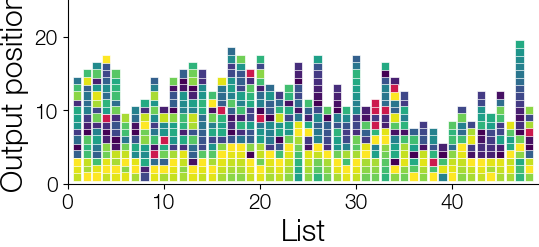

In [3]:
subj = data.query("subject == 10")
g = fr.plot_raster(subj);

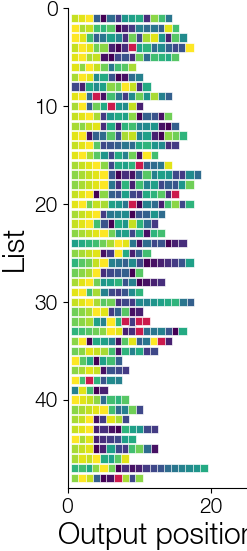

In [4]:
g = fr.plot_raster(subj, orientation="vertical");

### Plot all participants

In [5]:
mixed = data.query("list_type == 'mixed'").copy()
mixed = fr.reset_list(mixed)
pure = data.query("list_type == 'pure'").copy()
pure = fr.reset_list(pure)

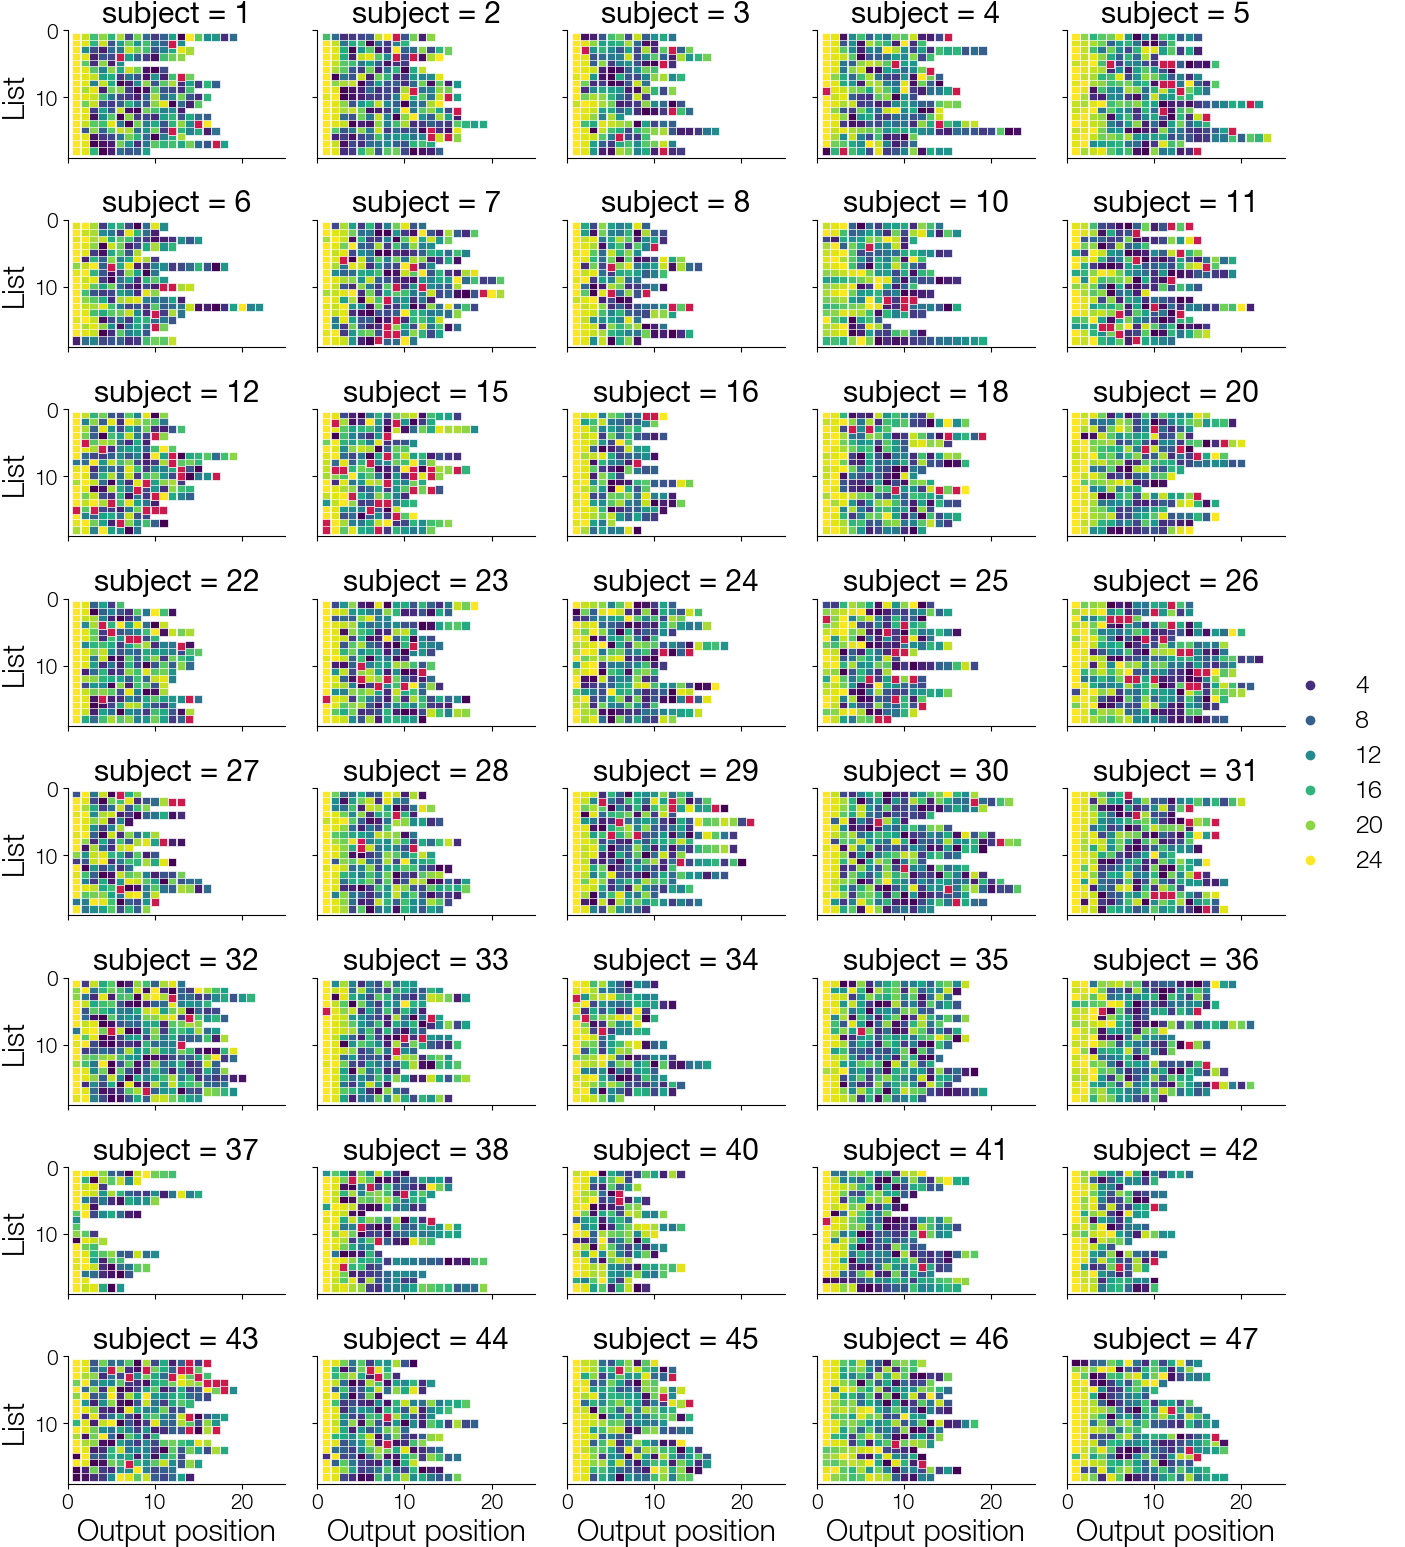

In [6]:
g = fr.plot_raster(pure, orientation="vertical", col="subject", col_wrap=5, length=2);
g.add_legend();

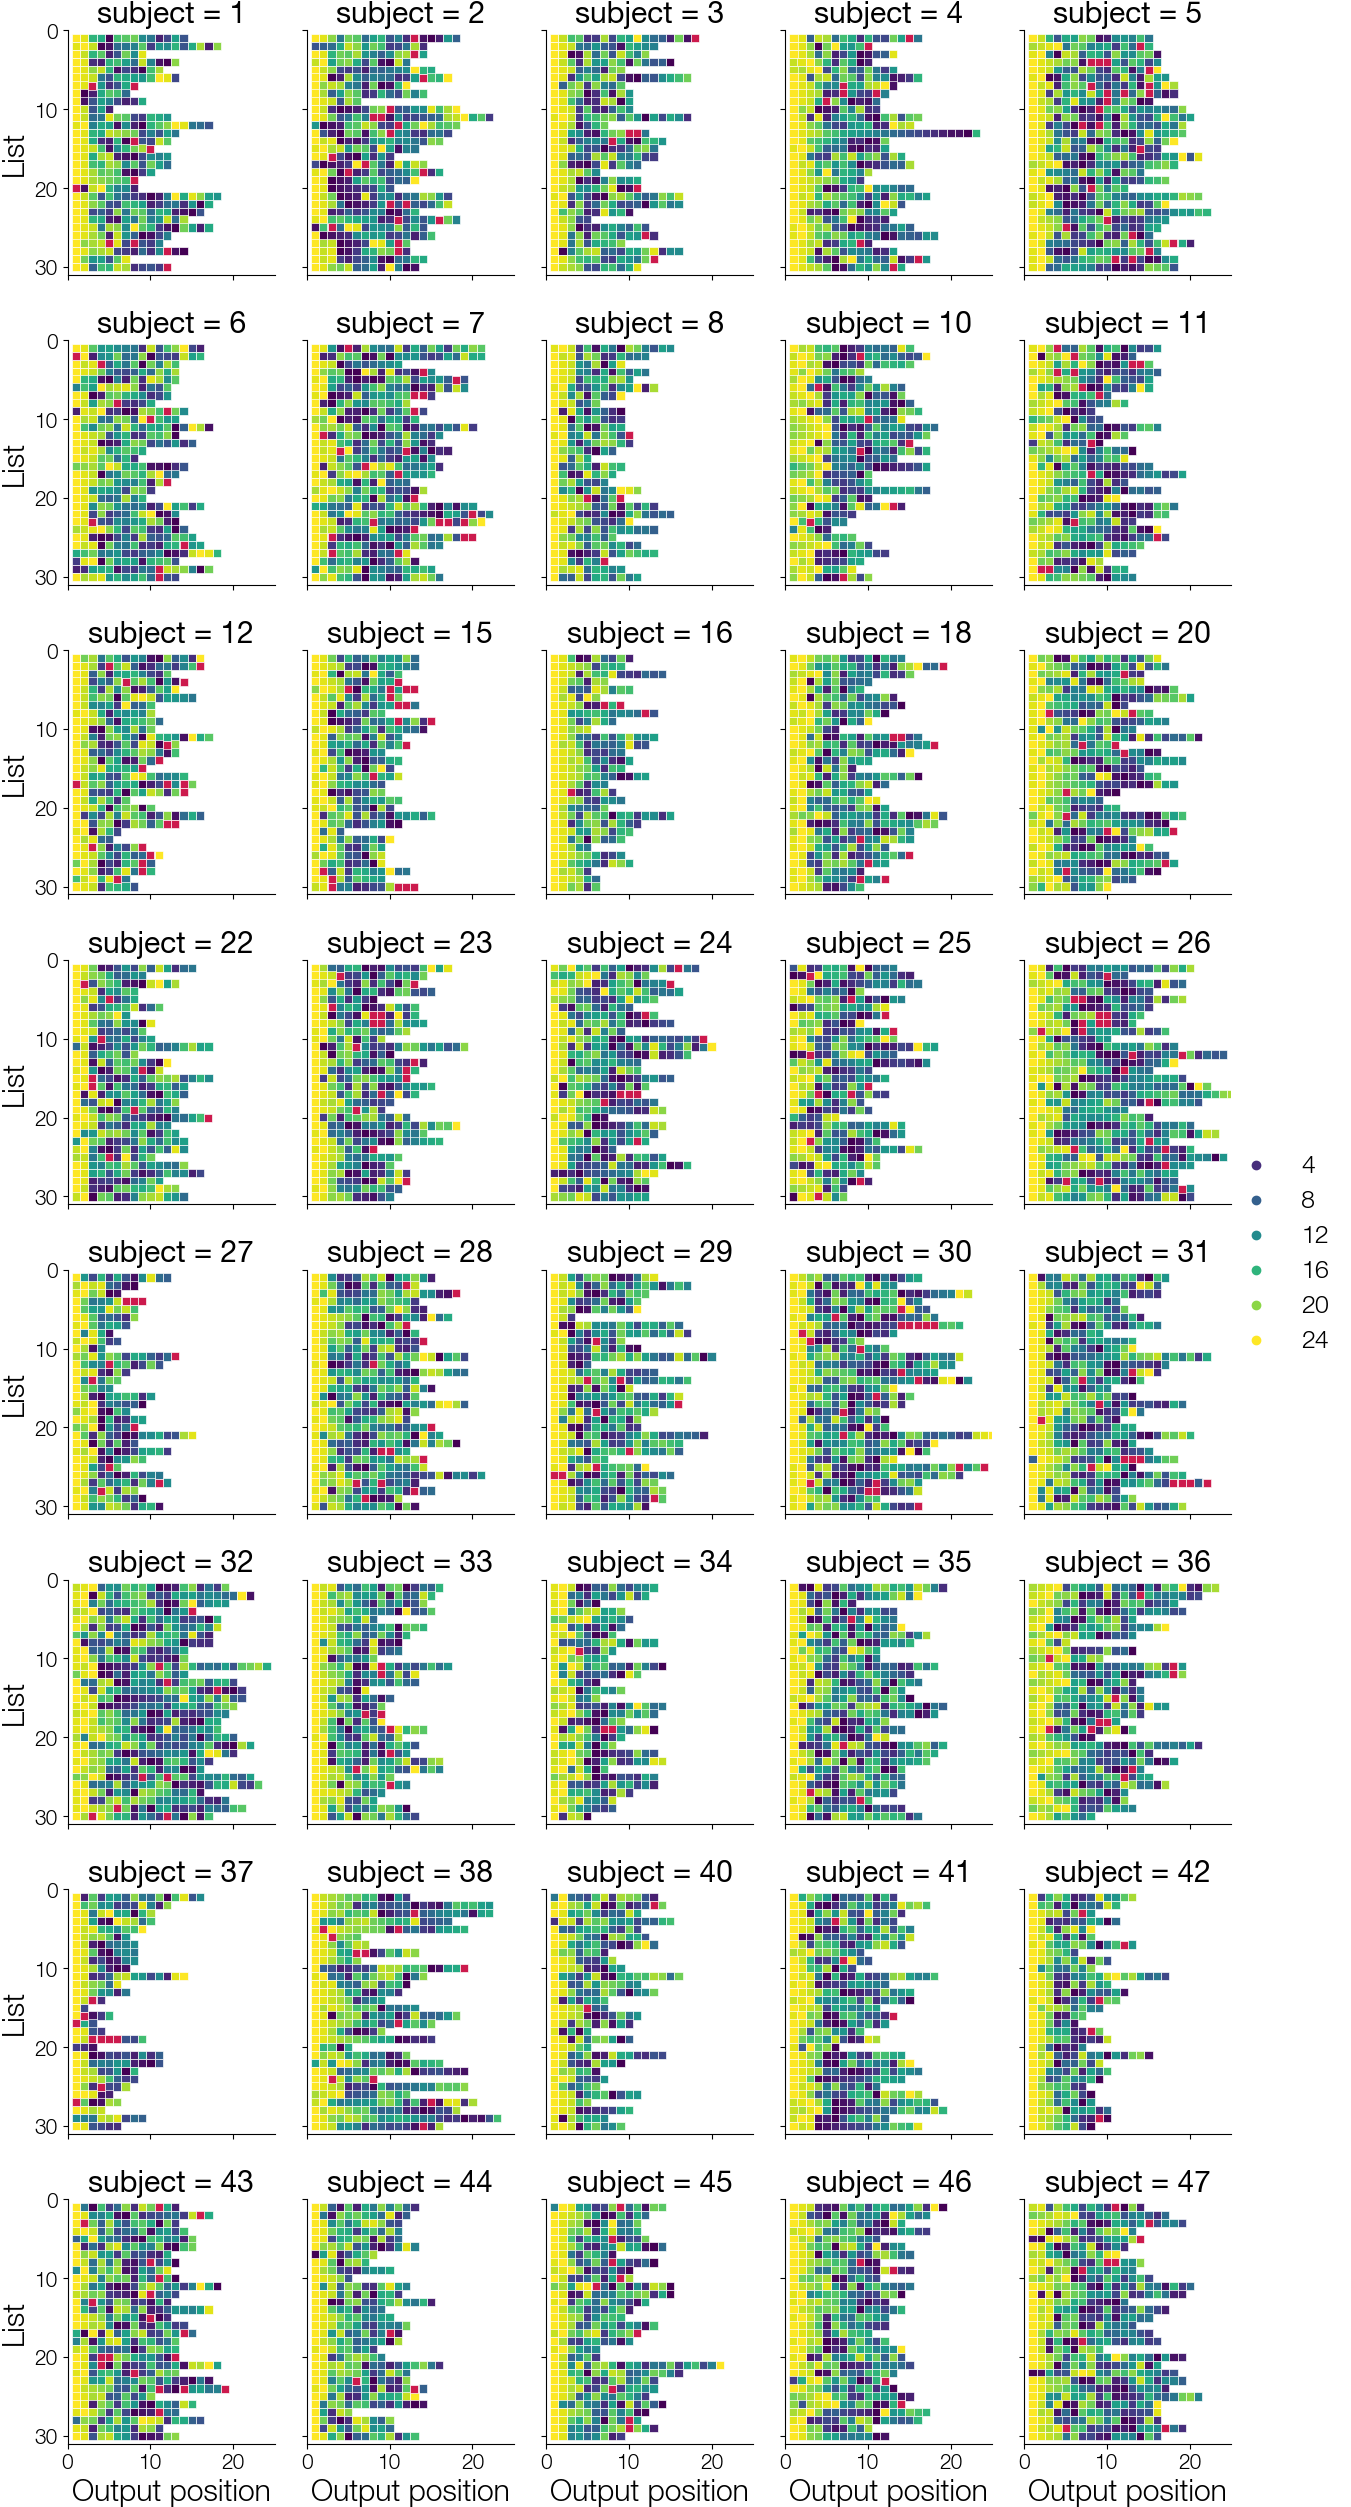

In [7]:
g = fr.plot_raster(
    mixed, orientation="vertical", col="subject", col_wrap=5, length=3.2
)
g.add_legend();

## Plot recalls labeled by stimulus category

Here, instead of serial position, we use category to set the hue of each recall marker. First, we'll get just the mixed lists and reset the list number to include only those lists.

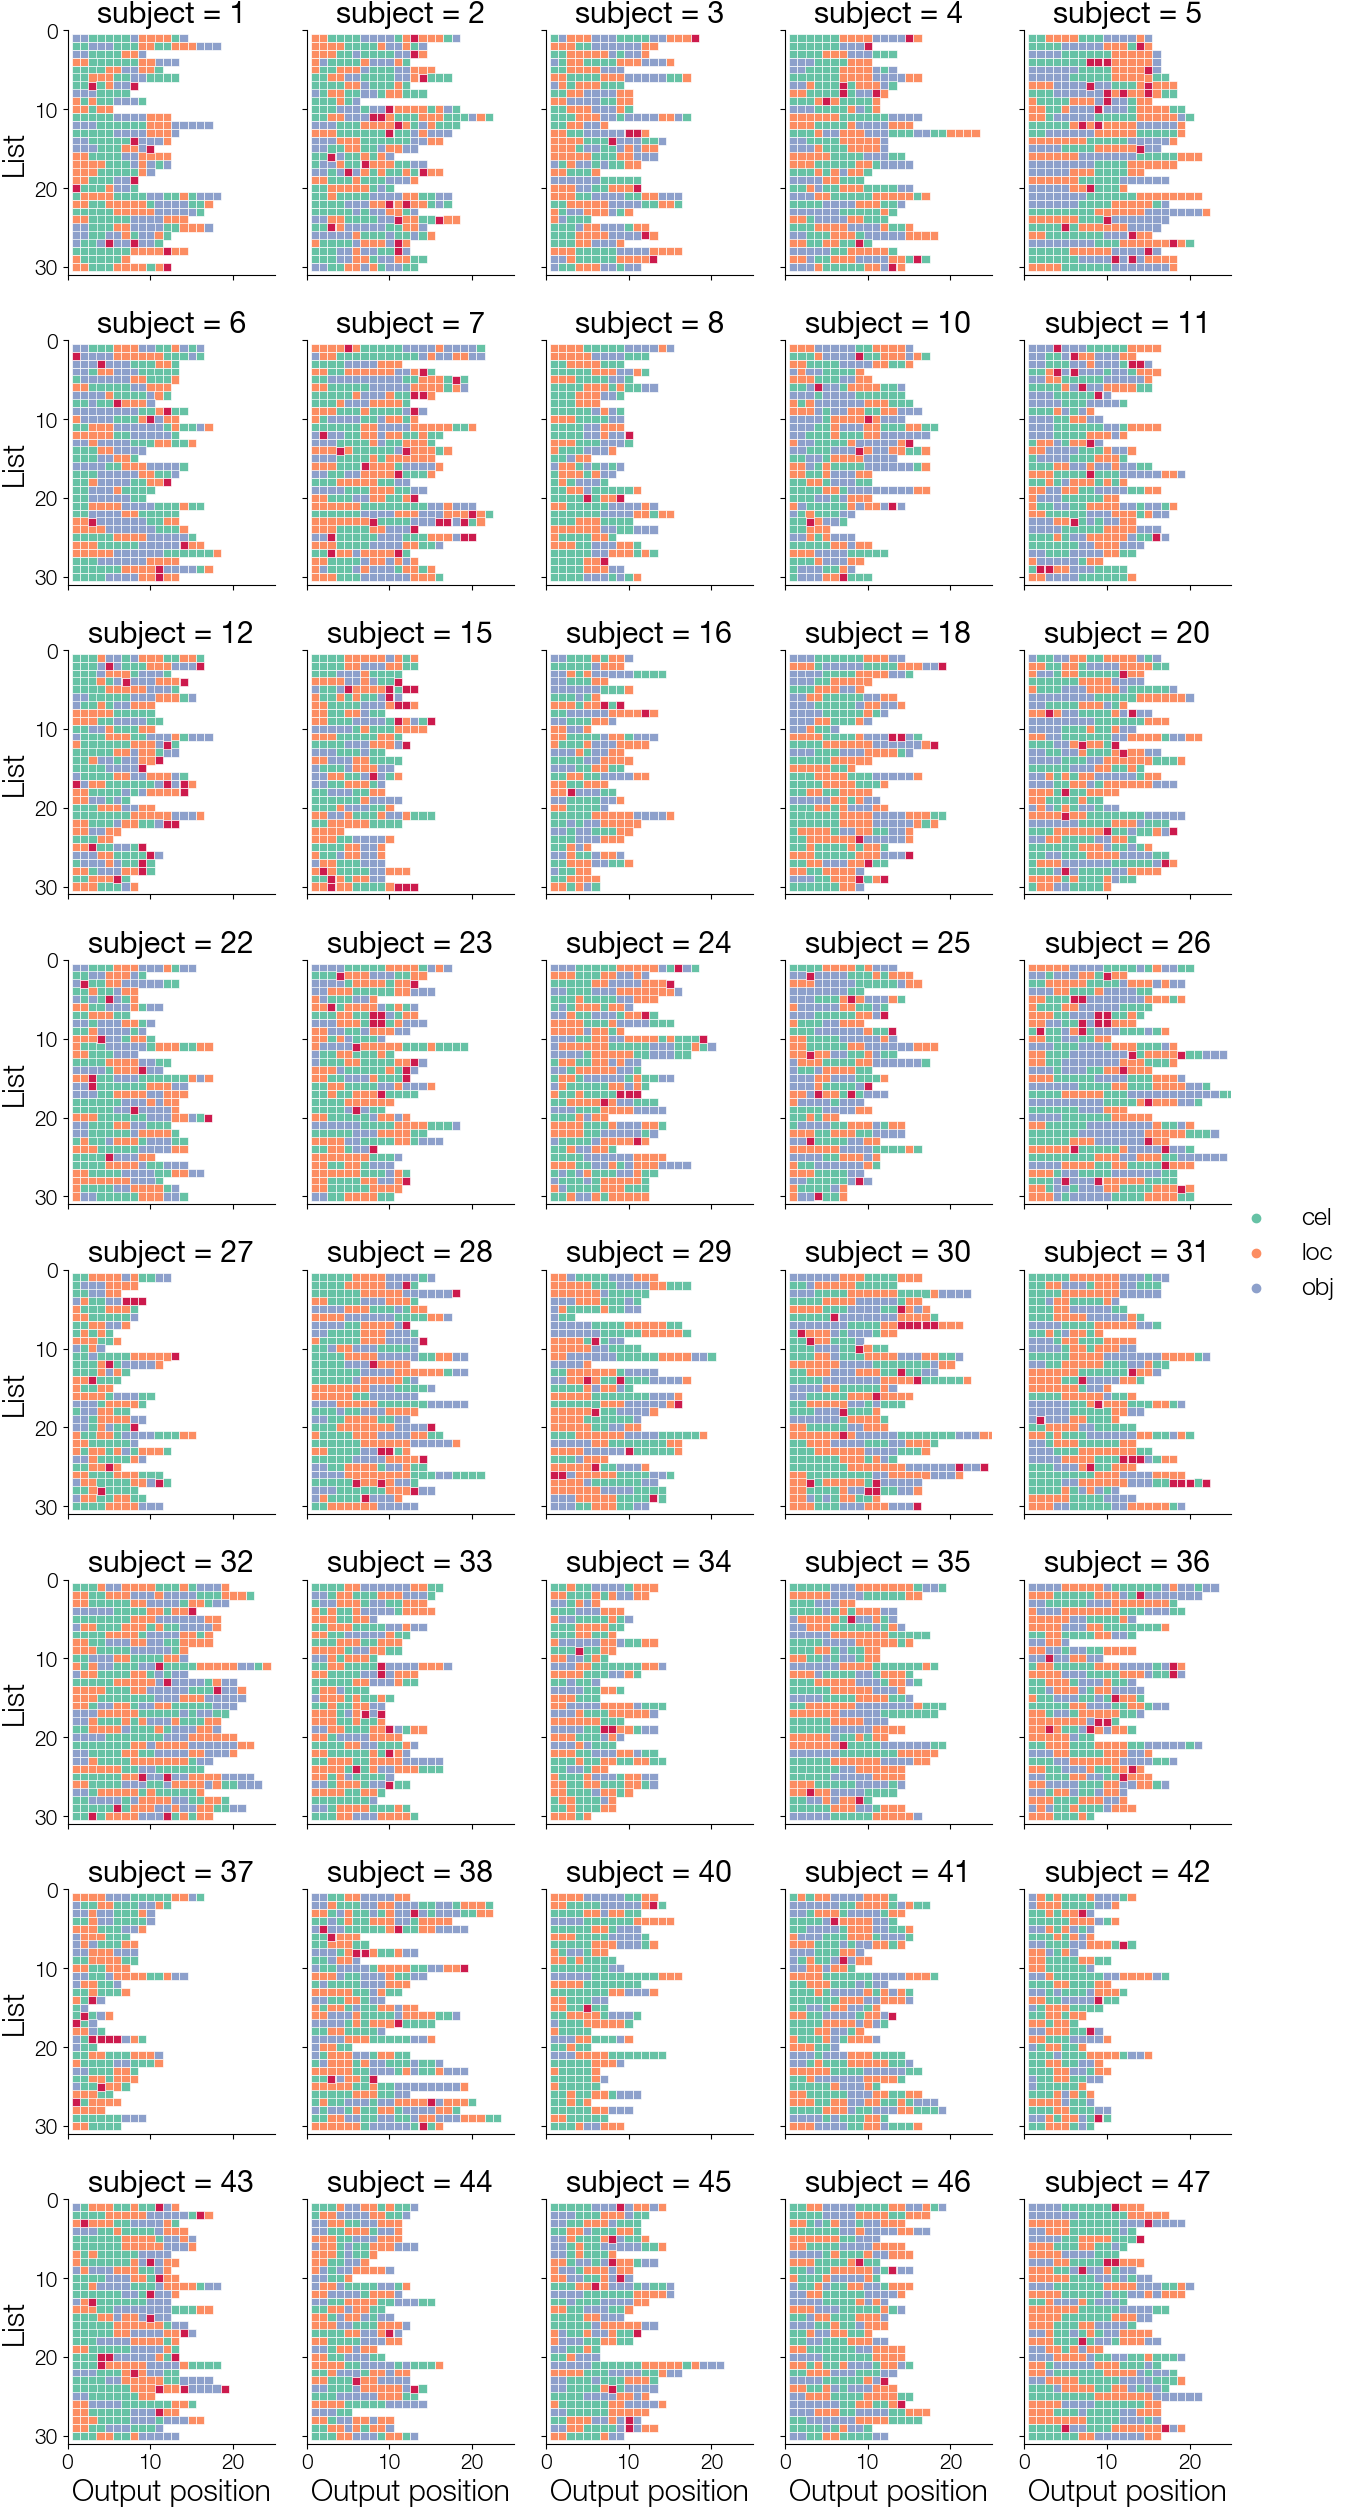

In [8]:
g = fr.plot_raster(
    mixed, 
    hue="category", 
    orientation="vertical", 
    palette=sns.color_palette("Set2", 3),
    col="subject", 
    col_wrap=5, 
    length=3.2
)
g.add_legend();

In [9]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

seaborn: 0.12.0
psifr  : 0.8.2

